In [1]:
import matplotlib
matplotlib.use('nbagg')
import matplotlib.animation as anm
import matplotlib.pyplot as plt
import math
import matplotlib.patches as patches
import numpy as np

In [2]:
class World:
    def __init__(self, debug=False): #デバッグ用のフラグを追加
        self.objects = [] #%%!ここにロボットなどのオブジェクトを登録
        self.debug = debug
        
    def append(self,obj):
        self.objects.append(obj)
    
    def draw(self):
        fig = plt.figure(figsize=(8,8)) #8x8inchの図を準備
        ax = fig.add_subplot(111) #サブプロットを準備
        ax.set_aspect('equal')
        ax.set_xlim(-5,5) #X軸を-5mx5mの範囲で描写
        ax.set_ylim(-5,5)
        ax.set_xlabel("X",fontsize=20)
        ax.set_ylabel("Y",fontsize=20)
        
        elems = []
        
        if self.debug:
            for i in range(1000): self.one_step(i, elems, ax)#デバッグ時はアニメーションさせない
        else:
            self.ani = anm.FuncAnimation(fig, self.one_step, fargs=(elems, ax), frames=10, interval=1000, repeat=False)
            plt.show()
            
    def one_step(self, i, elems, ax):
            while elems:elems.pop().remove()
            elems.append(ax.text(-4.4, 4.5, "t = "+str(i), fontsize=10))#座標ベタ書き

In [3]:
class IdealRobot:
    def __init__(self,pose,color="black"):
        self.pose = pose
        self.r = 0.2
        self.color = color
        
    def draw(self,ax):
        x,y,theta = self.pose
        xn = x + self.r *math.cos(theta)
        yn = y + self.r *math.sin(theta)
        ax.plot([x,xn],[y,yn],color=self.color)
        c = patches.Circle(xy=(x,y),radius=self.r,fill=False,color=self.color)
        ax.add_patch(c)

<IPython.core.display.Javascript object>


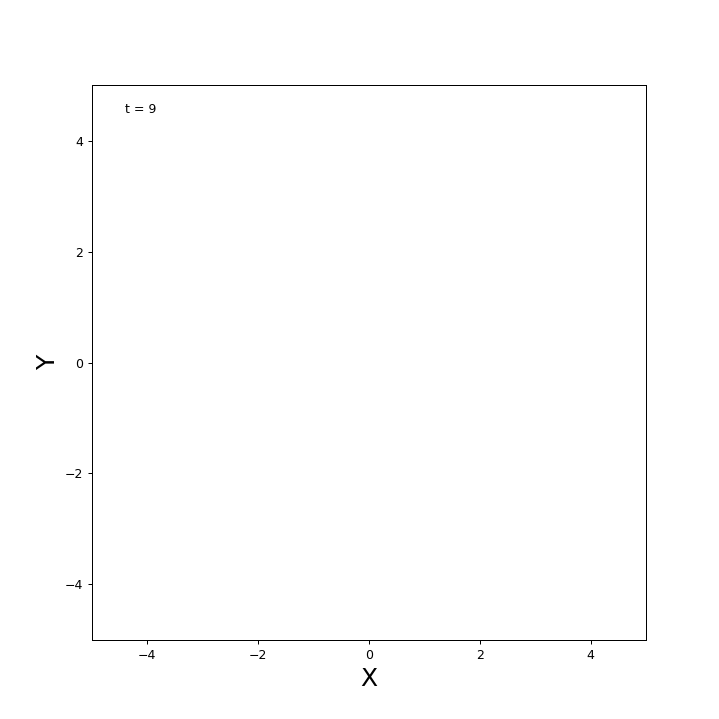

In [4]:
world = World()
# world.draw()

robot1 = IdealRobot(np.array([2,3,math.pi/6]).T)
robot2 = IdealRobot(np.array([-2,-1,math.pi/5*6]).T,"red")
world.append(robot1)
world.append(robot2)
world.draw()